# Визуализация, seaborn

In [1]:
import pandas as pd
import numpy as np

In [5]:
%matplotlib inline  # Чтобы получать графики сразу в Jupyter
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
students_performance = pd.read_csv("data/StudentsPerformance.csv")

In [11]:
students_performance = students_performance.rename(columns={
    "parental level of education": "parental_level_of_education",
    "test preparation course": "test_preparation_course",
    "math score": "math_score",
    "reading score": "reading_score",
    "writing score": "writing_score"
})
students_performance.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Построим распределение `math_score`
Средствами Pandas:

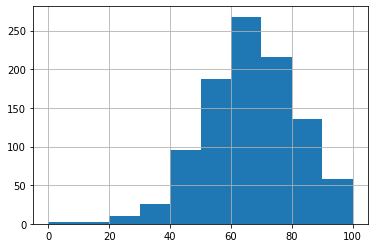

In [19]:
students_performance.math_score.hist();

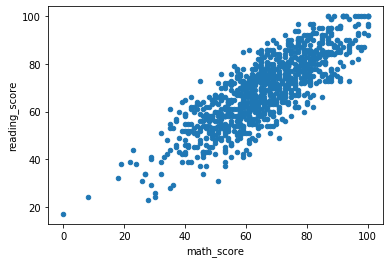

In [20]:
students_performance.plot.scatter(x="math_score", y="reading_score");

Cредствами Seaborn:  

`lmplot` - график точек  
`hue="gender"` - группировка по переменной gender   
`fit_reg=False` - убрать регрессионную прямую

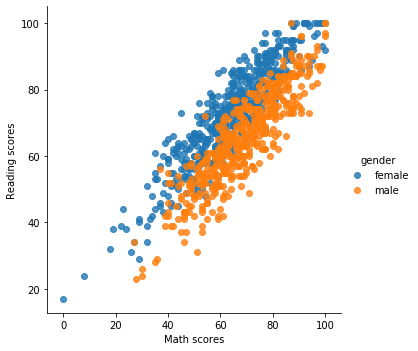

In [29]:
ax = sns.lmplot(x="math_score", y="reading_score", hue="gender", data=students_performance, fit_reg=False)
ax.set_xlabels("Math scores")
ax.set_ylabels("Reading scores");

## Практика
### Задание №1
Представьте, что у вас есть датафрэйм'df', хранящий данные о зарплате за месяц, со всего 1-ой колонкой `income`.
Укажите верные способы, как отрисовать простой график зависимости зарплаты от даты (то, как отображается дата сейчас не важно, главное сам график)  
Убедитесь, что вы используте версию seaborn > = 0.9.

In [53]:
df = pd.read_csv("data/income.csv")
df

,income
2018-11-30,20
2018-12-31,60
2019-01-31,180
2019-02-28,380
2019-03-31,660


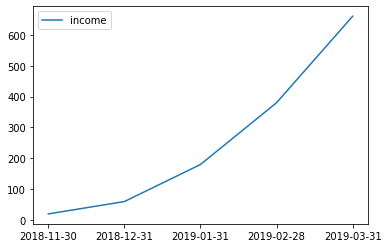

In [54]:
sns.lineplot(data=df);

### Задание №3
Вам дан датасэт с 2-мя фичами (колонками). Постройте график распределения точек (наблюдений) в пространстве этих 2-ух переменных (одна из них будет x, а другая - y) и напишите число кластеров, формируемых наблюдениями.  

В ответе вы должны указать число кластеров в виде числа (например: 3).

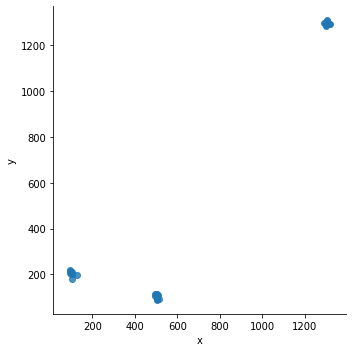

In [55]:
df = pd.read_csv("data/dataset_209770_6.csv", sep=" ")
sns.lmplot(x="x", y="y", data=df, fit_reg=False);

Ответ: 3

### Задание №4
Скачайте данные, представляющие геномные расстояния между видами, и постройте тепловую карту, чтобы различия было видно наглядно. В ответ впишите, какая картинка соответствует скачанным данным.  

Чтобы график отображался как на картинках, добавьте   

```python
g = # ваш код для создания теплокарты, укажите параметр cmap=viridis для той же цветовой схемы
g.xaxis.set_ticks_position('top')
g.xaxis.set_tick_params(rotation=90)
```

In [102]:
df = pd.read_csv("https://stepik.org/media/attachments/course/4852/genome_matrix.csv", index_col=0)
df

,species0,species1,species2,species3,species4
species0,0.536029,0.920292,0.679708,0.840606,0.430842
species1,0.920292,0.862417,0.887593,0.769754,0.203214
species2,0.679708,0.887593,0.595156,0.003435,0.096052
species3,0.840606,0.769754,0.003435,0.458870,0.029251
species4,0.430842,0.203214,0.096052,0.029251,0.642109


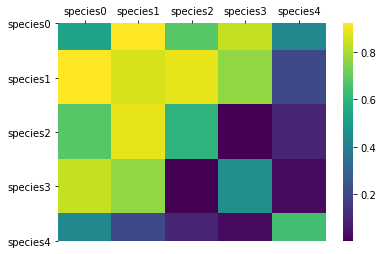

In [103]:
g = sns.heatmap(df, cmap="viridis")
g.xaxis.set_ticks_position('top')
g.yaxis.set_tick_params(rotation=0)

### Задание №4
Пришло время узнать, ~~кто самый главный рак~~ какая роль в dota самая распространённая. Скачайте [датасэт](https://stepik.org/media/attachments/course/4852/dota_hero_stats.csv) с данными о героях из игры dota 2 и посмотрите на распределение их возможных ролей в игре (колонка roles). Постройте гистограмму, отражающую скольким героям сколько ролей приписывается (по мнению Valve, конечно) и напишите какое число ролей у большинства героев.  

Это задание можно выполнить многими путями, и рисовать гистограмму вообще говоря для этого не нужно.  

Данные взяты [отсюда](https://api.opendota.com/api/heroes), на этом же сайте можно найти больше разнообразных данных по dota 2

In [107]:
df = pd.read_csv("https://stepik.org/media/attachments/course/4852/dota_hero_stats.csv", index_col=0)

In [108]:
df.head()

,attack_type,id,legs,localized_name,name,primary_attr,roles
0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']"
1,Melee,2,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']"
2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']"
3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini..."
4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"['Support', 'Disabler', 'Nuker', 'Jungler']"


In [117]:
df['role_count']=df['roles'].map(lambda x: len(eval(x)))
df['role_count']

0      3
1      4
2      4
3      5
4      4
      ..
112    4
113    4
114    6
115    4
116    4
Name: role_count, Length: 117, dtype: int64

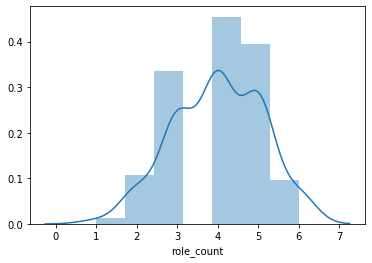

In [119]:
sns.distplot(df["role_count"]);

### Задание №5
Теперь перейдём к [цветочкам](https://stepik.org/media/attachments/course/4852/iris.csv). Магистрантка Адель решила изучить какие бывают ирисы. Помогите Адель узнать об ирисах больше - скачайте датасэт со значениями параметров ирисов, постройте их распределения и отметьте правильные утверждения, глядя на график.  

Распределение должно быть по всем образцам, без разделения на вид.  
Чтобы построить на 1-ом графике распределения для каждого из параметров, можно воспользоваться петлёй
```python
for column in df:
    # Draw distribution with that column
```
Ссылки для изучения:  
[kdeplot](https://seaborn.pydata.org/generated/seaborn.kdeplot.html)  
[distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html)  

In [122]:
df = pd.read_csv("https://stepik.org/media/attachments/course/4852/iris.csv", index_col=0)
df.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


`kde_kws={"label":column}` - Добавляет легенду для `displot`

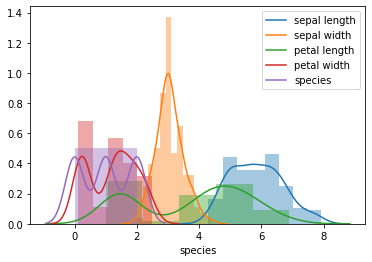

In [135]:
for column in df:
    sns.distplot(df[column], kde_kws={"label":column})

### Задание №6
Рассмотрим длину лепестков (petal length) подробнее и воспользуемся для этого violin плотом. Нарисуйте распределение длины лепестков ирисов из предыдущего датасэта с помощью violin плота и выберите правильный (такой же) вариант среди предложенных  

[Мануал по рисованию violin плотов](https://seaborn.pydata.org/generated/seaborn.violinplot.html)

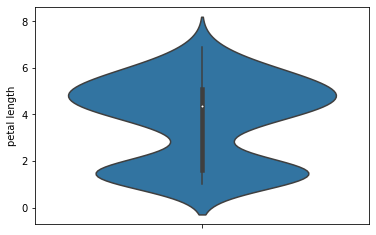

In [137]:
sns.violinplot(df["petal length"], orient="v")

ответ: 1

### Задание №7
Продолжаем изучение ирисов! Ещё один важный тип графиков - `pairplot`, отражающий зависимость пар переменных друг от друга, а также распределение каждой из переменных. Постройте его и посмотрите на scatter плоты для каждой из пар фичей. Какая из пар навскидку имеет наибольшую корреляцию?  

Также обратите внимание, что можно разделить на группы с помощью параметра `hue`.  

Ссылки для изучения: 
[pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

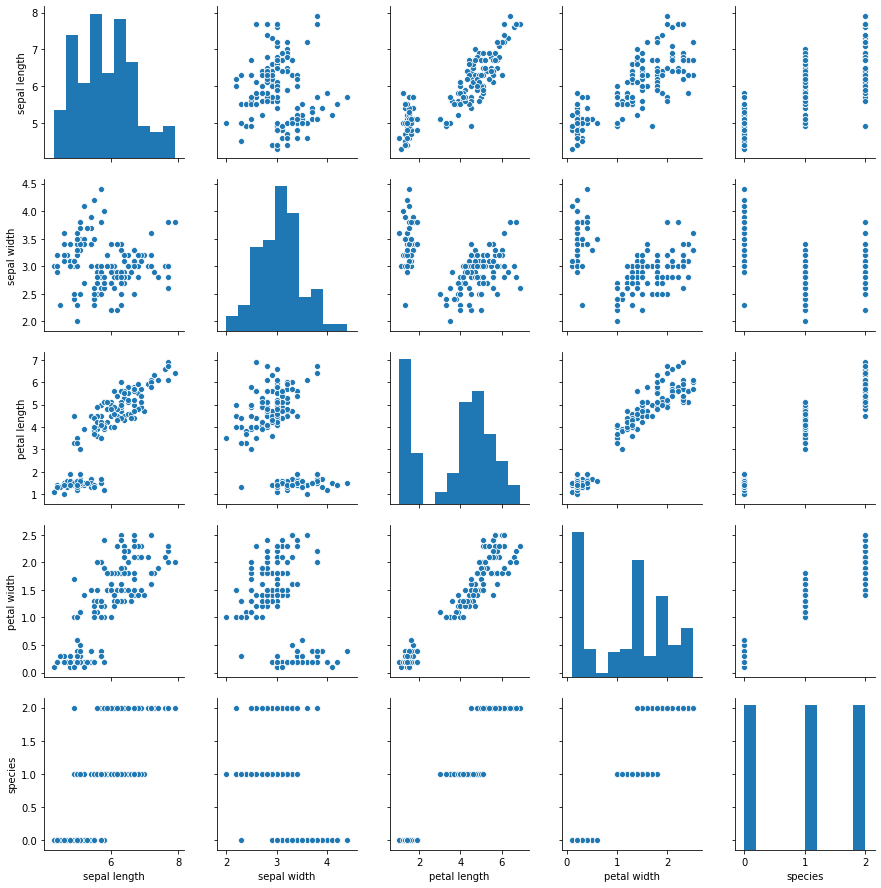

In [139]:
sns.pairplot(df);

Напоминание: если совсем просто, то "коррелируют" == "меняются одинаково". Т.е. две величины коррелируют между собой, если изменение одной величины влечёт такое же изменение другой. Значит чем сильнее корреляция между двумя величинами $x$ и $y$, тем меньше точки отклоняются от прямой $y=x$.